In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import yfinance as yf 

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
def predicting_price(coin, 
                     start_train='2016-01-01', 
                     start_test='2022-01-01', 
                     prediction_days=10, 
                     future_day=2, 
                     epochs=25):

    data = yf.download(coin, start=start_train)

    #prepare data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
    prediction_days = prediction_days
    future_day = future_day

    x_train, y_train = [], []

    for x in range(prediction_days, len(scaled_data) - future_day):
        x_train.append(scaled_data[x-prediction_days:x, 0])
        y_train.append(scaled_data[x + future_day, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    model = Sequential()

    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    # model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, epochs=epochs, batch_size=64)

    # testing model
    test_data = yf.download(coin, start=start_test)
    
    actual_price = test_data['Close'].values

    total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)
    model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
    model_inputs = model_inputs.reshape(-1,1)
    model_inputs = scaler.fit_transform(model_inputs)

    x_test = []

    for x in range(prediction_days, len(model_inputs)):
        x_test.append(model_inputs[x-prediction_days:x, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    prediction_prices = model.predict(x_test)
    prediction_prices = scaler.inverse_transform(prediction_prices)

    # plt.figure(figsize=(16,10))
    # plt.grid(True)
    # plt.plot(actual_price, color='black', label='Actual Prices')
    # plt.plot(prediction_prices, color='green', label='Predicted Prices')
    # plt.title('BTC-USD price prediction')
    # plt.xlabel('Time')
    # plt.ylabel('Price')
    # plt.legend(loc='upper left')
    # plt.show()

    # predict next days

    real_data = [model_inputs[len(model_inputs) + 1 - prediction_days: len(model_inputs) + 1, 0]]
    real_data = np.array(real_data)
    real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

    prediction = model.predict(real_data)
    prediction = scaler.inverse_transform(prediction)
    # print(prediction)

    return prediction_prices, actual_price, prediction

In [8]:
predicted_df, actual_df, prediction = predicting_price('BTC-USD', 
                                                       start_train='2011-01-01', 
                                                       start_test='2020-08-17', 
                                                       prediction_days=50, 
                                                       future_day=10, 
                                                       epochs=10)

[*********************100%***********************]  1 of 1 completed
Epoch 1/10


2023-08-17 22:26:52.186923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-17 22:26:52.450878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-17 22:26:52.498567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-17 22:26:52.546503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-17 22:26:52.630138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/50 [..............................] - ETA: 1:27 - loss: 0.1713 - accuracy: 0.0000e+00

2023-08-17 22:26:52.719182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-17 22:26:52.801264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 3s 27ms/step - loss: 0.0145 - accuracy: 6.2559e-04
Epoch 2/10
50/50 [==============================] - 1s 24ms/step - loss: 0.0032 - accuracy: 6.2559e-04
Epoch 3/10
50/50 [==============================] - 1s 26ms/step - loss: 0.0029 - accuracy: 6.2559e-04
Epoch 4/10
50/50 [==============================] - 1s 24ms/step - loss: 0.0027 - accuracy: 6.2559e-04
Epoch 5/10
50/50 [==============================] - 1s 26ms/step - loss: 0.0027 - accuracy: 6.2559e-04
Epoch 6/10
50/50 [==============================] - 1s 25ms/step - loss: 0.0026 - accuracy: 6.2559e-04
Epoch 7/10
50/50 [==============================] - 1s 23ms/step - loss: 0.0027 - accuracy: 6.2559e-04
Epoch 8/10
50/50 [==============================] - 1s 25ms/step - loss: 0.0025 - accuracy: 6.2559e-04
Epoch 9/10
50/50 [==============================] - 1s 24ms/step - loss: 0.0024 - accuracy: 6.2559e-04
Epoch 10/10
50/50 [==============================] - 1s 24ms/step - loss: 0.0023 - a

2023-08-17 22:27:05.653985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-17 22:27:05.736310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-17 22:27:05.771119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-17 22:27:05.813109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 402ms/step


2023-08-17 22:27:06.431859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-17 22:27:06.513903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-17 22:27:06.545389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-17 22:27:06.583352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [25]:
pred = pd.DataFrame(predicted_df)
data = pd.concat([candle_data, pred], axis=1)
data.rename(columns={0 : 'predicted'}, inplace=True)

In [17]:
candle_data = yf.download('BTC-USD', start='2020-08-17')
candle_data = candle_data.reset_index()
df3 = pd.DataFrame(predicted_df)

[*********************100%***********************]  1 of 1 completed


In [18]:
fig = go.Figure(data=[go.Candlestick(x=candle_data.index[-400:],
                open=candle_data['Open'][-400:],
                high=candle_data['High'][-400:],
                low=candle_data['Low'][-400:],
                close=candle_data['Close'][-400:]),
                go.Scatter(x=df3.index[-400:], y=df3[0][-400:], line=dict(color='purple', width=1), name="Predicted")])

fig.add_scatter(x=df3.index[-400:], y=df3[0][-400:], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="Predicted")

fig.update_layout(title="BTC-prediction", height=700, width=1200)
fig.show()

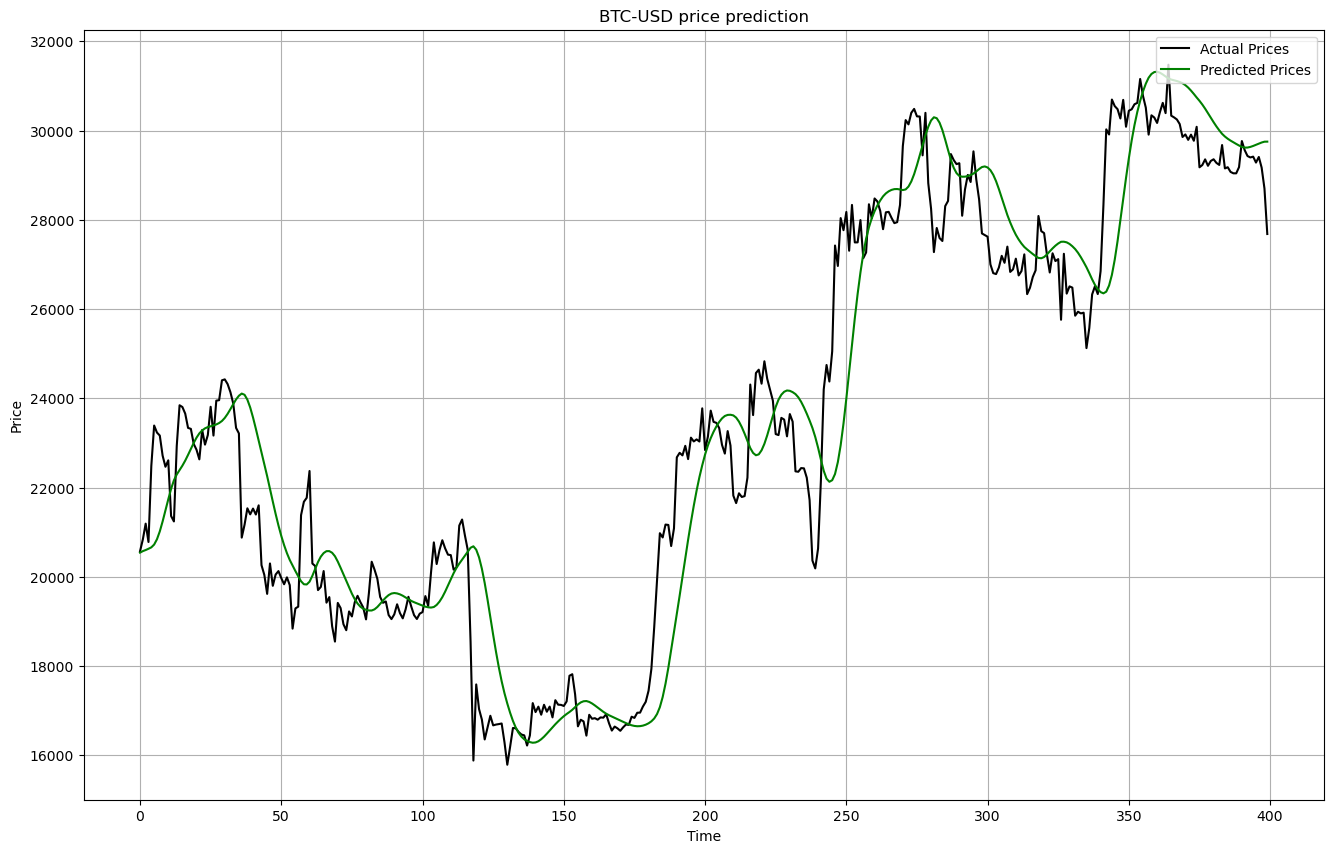

In [13]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(actual_df[-400:], color='black', label='Actual Prices')
plt.plot(predicted_df[-400:], color='green', label='Predicted Prices')
plt.title('BTC-USD price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()